In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data = df.drop(df[['Name','Sex','Ticket','Cabin','Embarked','PassengerId']], axis=1)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,22.0,1,0,7.2500,NaN,S
1,2,1,1,38.0,1,0,71.2833,C85,C
2,3,1,3,26.0,0,0,7.9250,NaN,S
3,4,1,1,35.0,1,0,53.1000,C123,S
4,5,0,3,35.0,0,0,8.0500,NaN,S


In [ ]:
data.fillna(0)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,22.0,1,0,7.2500,0,S
1,2,1,1,38.0,1,0,71.2833,C85,C
2,3,1,3,26.0,0,0,7.9250,0,S
3,4,1,1,35.0,1,0,53.1000,C123,S
4,5,0,3,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,S
887,888,1,1,19.0,0,0,30.0000,B42,S
888,889,0,3,0.0,1,2,23.4500,0,S
889,890,1,1,26.0,0,0,30.0000,C148,C


In [ ]:
lr = LabelEncoder()
data['Embarked_l'] = lr.fit_transform(df['Embarked'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Age          891 non-null    int64
 4   SibSp        891 non-null    int64
 5   Parch        891 non-null    int64
 6   Fare         891 non-null    int64
 7   Cabin_l      891 non-null    int64
 8   Embarked_l   891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


In [ ]:
data['Age'] = data['Age'].fillna(0).astype(int)

In [ ]:
data['Fare'] = data['Fare'].fillna(0).astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Age          891 non-null    int64
 4   SibSp        891 non-null    int64
 5   Parch        891 non-null    int64
 6   Fare         891 non-null    int64
 7   Cabin_l      891 non-null    int64
 8   Embarked_l   891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


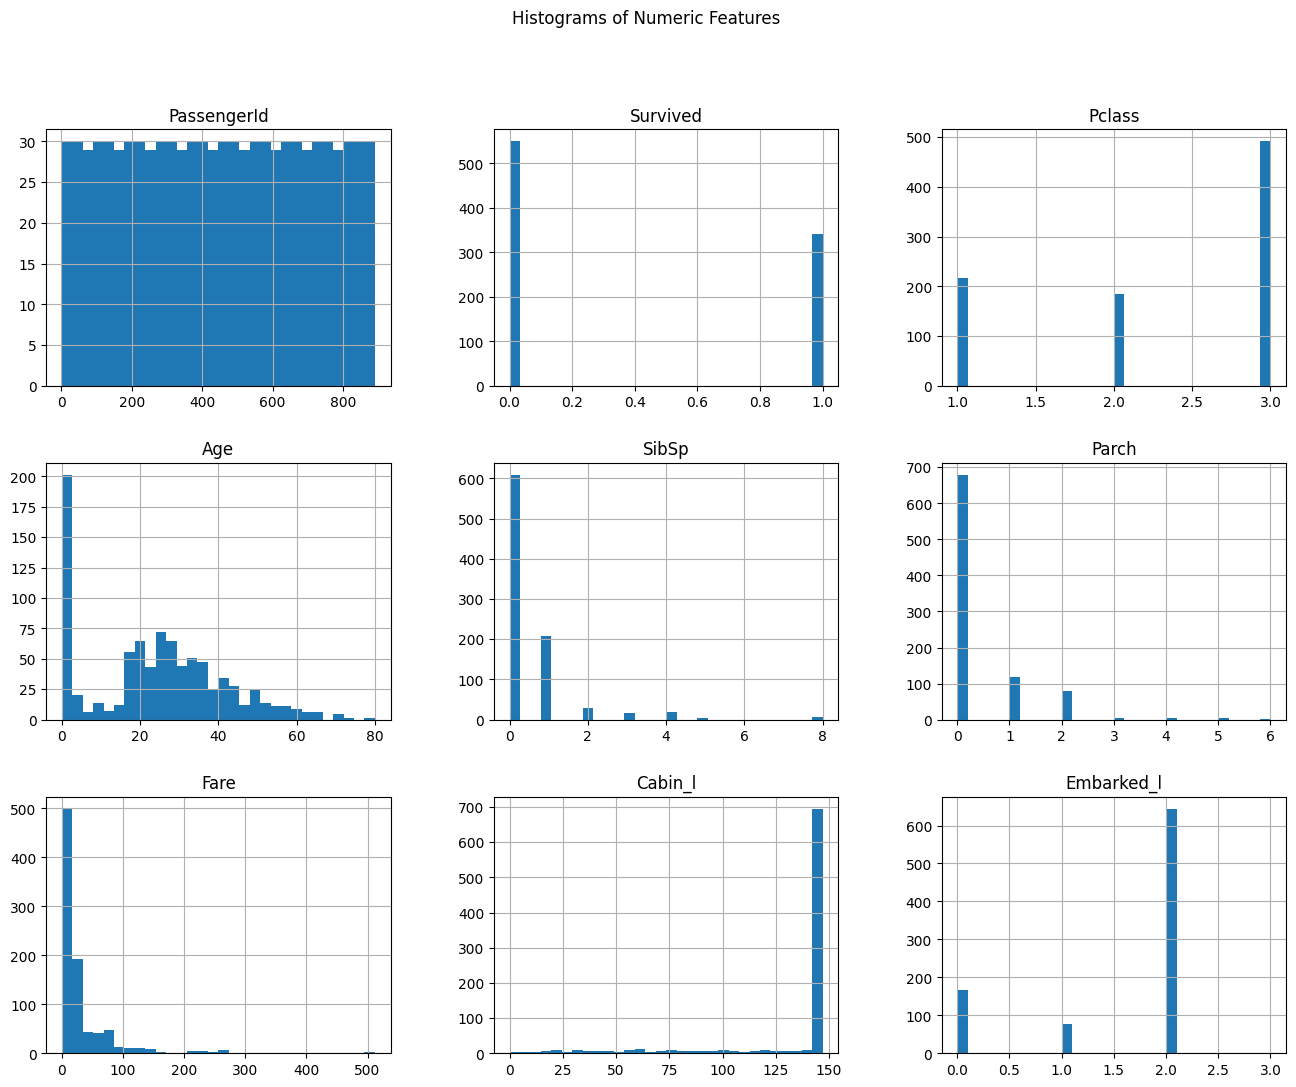

In [ ]:
data.hist(bins=30, figsize=(16, 12))
plt.suptitle('Histograms of Numeric Features')
plt.show()

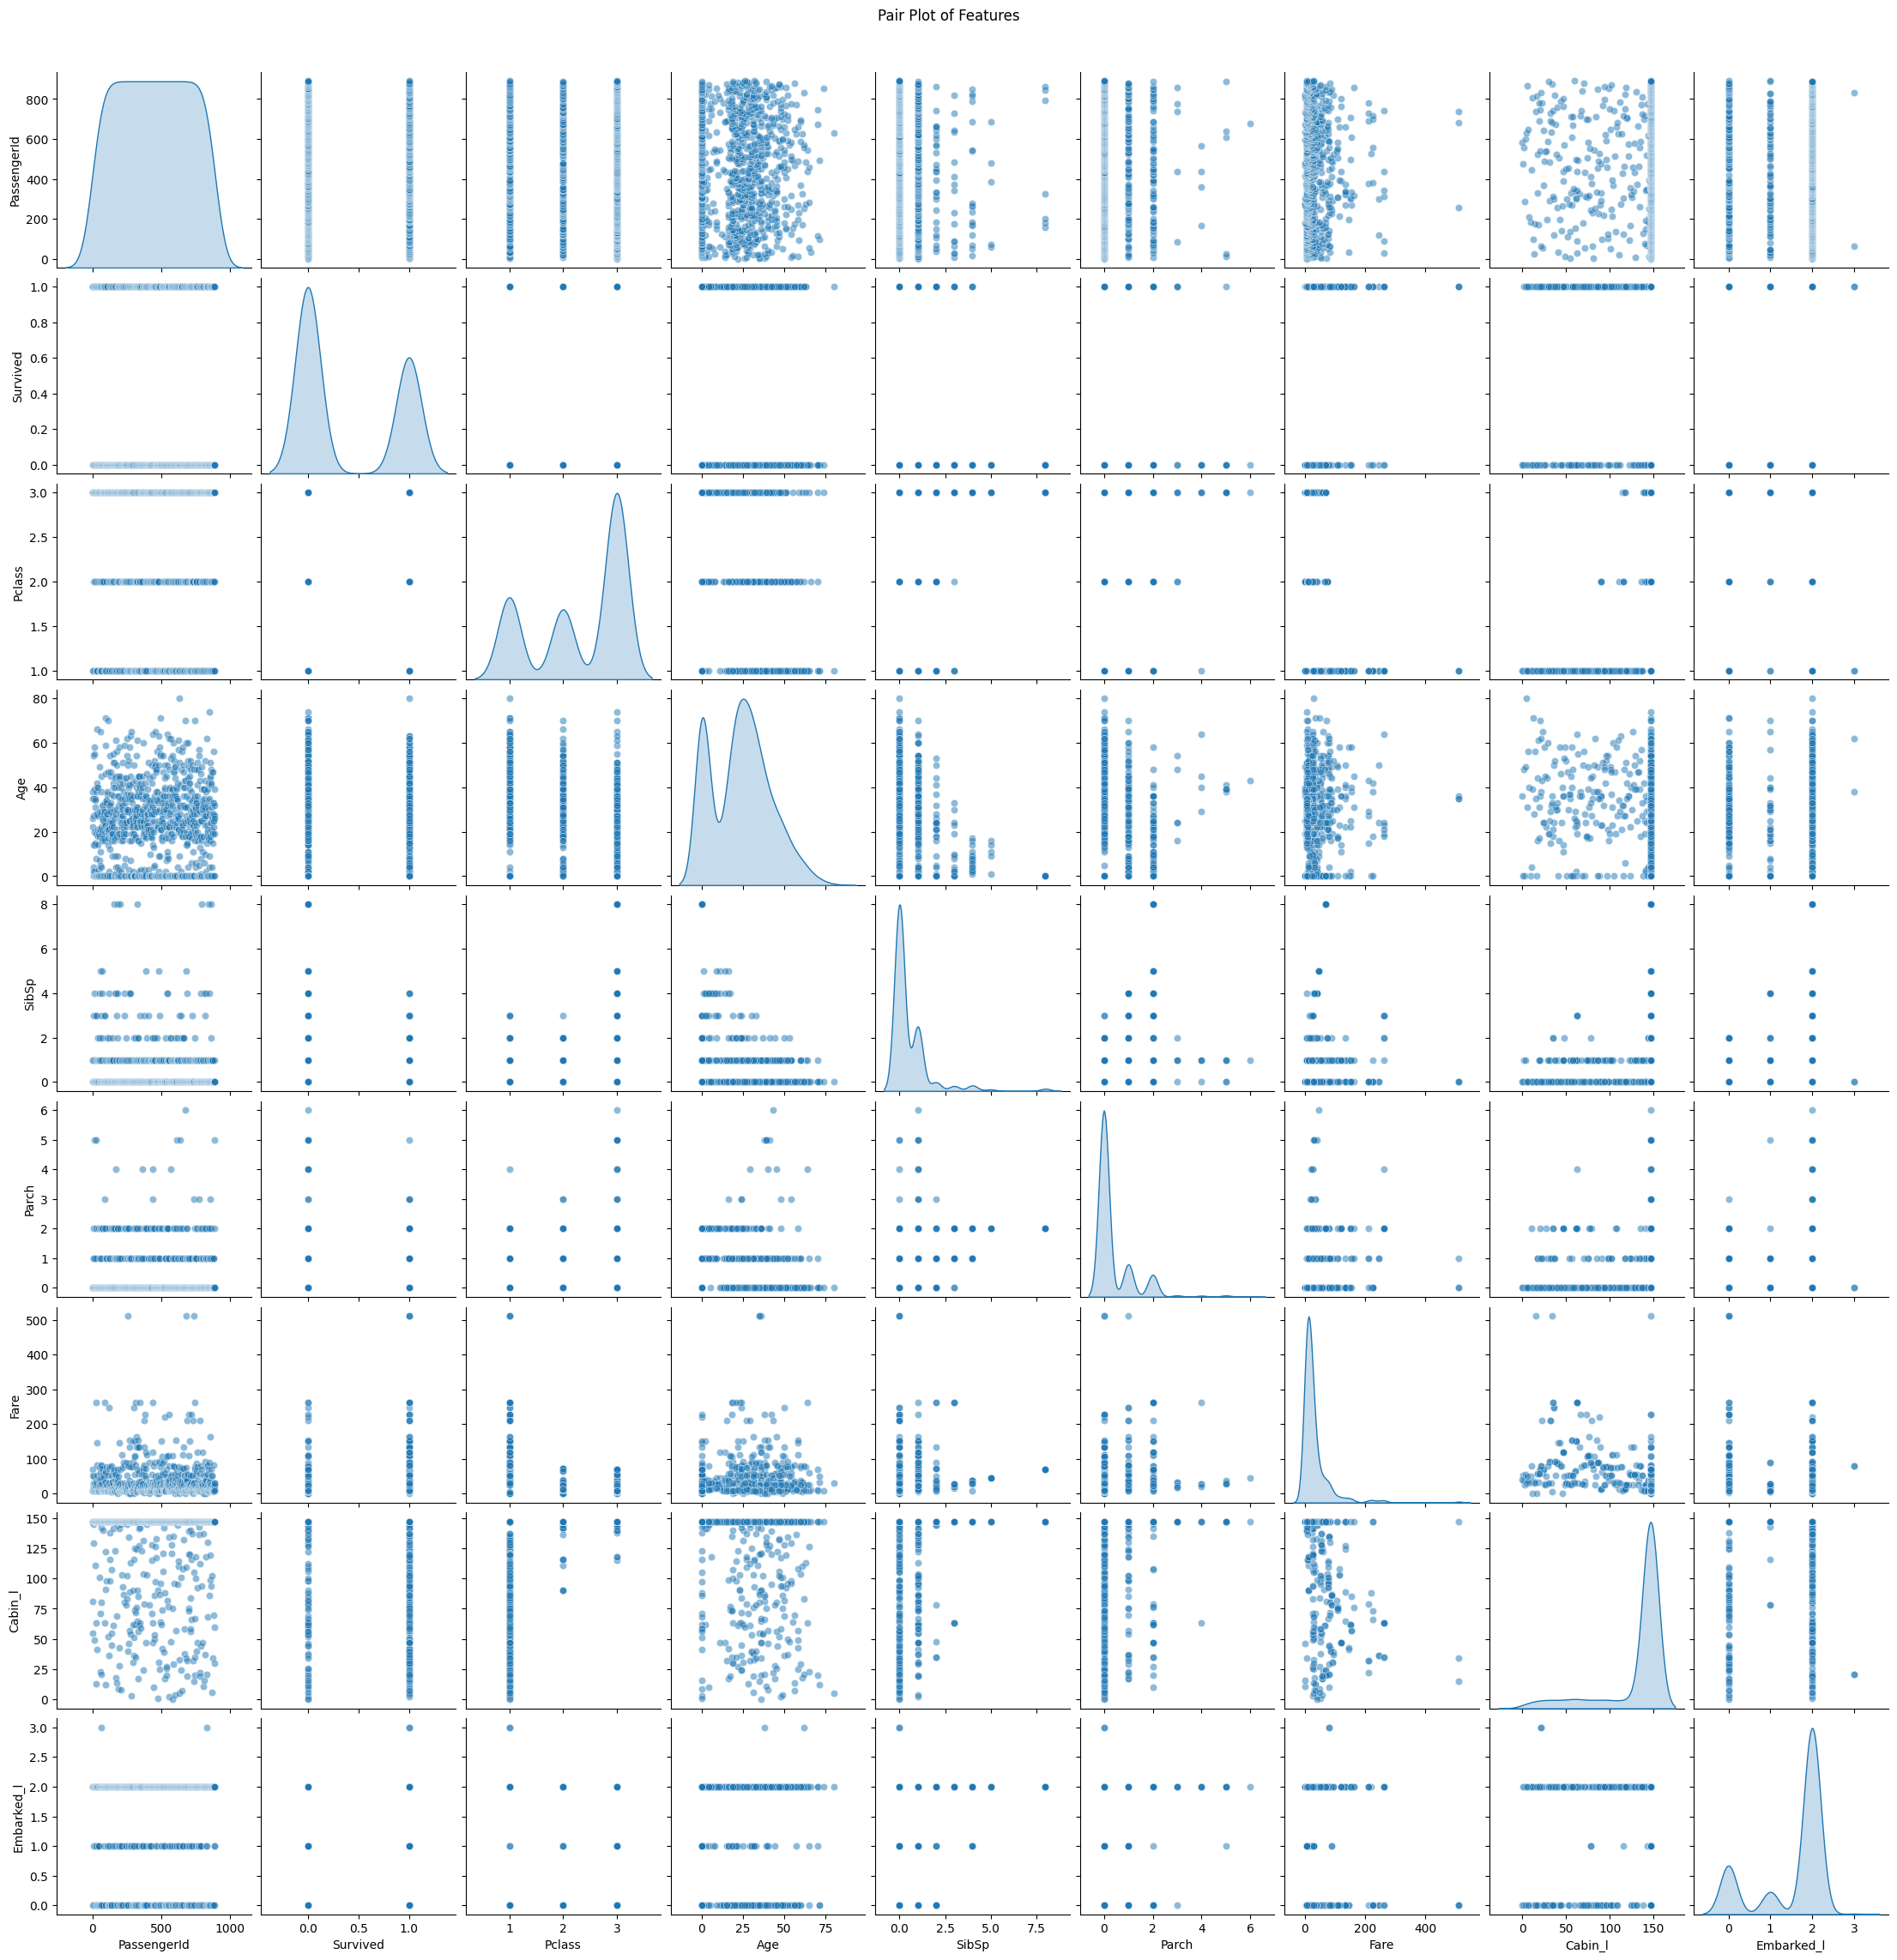

In [ ]:
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Pclass','Age','SibSp','Parch','Fare','Embarked_l']])

In [ ]:
x = pd.DataFrame(scaled_features)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mse: ",mse)
print("accuracy score: ",accuracy_score(y_test, y_pred2))

mse:  0.2849162011173184
accuracy score:  0.7150837988826816
